In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, History
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
maxlen = 500  # Maximum review length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [12]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 32, input_length = maxlen))
model.add(SimpleRNN(32, return_sequences = True, kernel_regularizer = tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(SimpleRNN(32, return_sequences = True, kernel_regularizer = tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(SimpleRNN(32, kernel_regularizer = tf.keras.regularizers.l2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 500, 32)           2080      
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 500, 32)           2080      
                                                                 
 dropout_3 (Dropout)         (None, 500, 32)           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                

In [14]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [15]:
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor = 'val_accuracy',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 1)

early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 2,
                               verbose = 1)

In [16]:
history = History()

In [17]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2,
                    callbacks = [checkpoint, early_stopping])

Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 1.3116 - accuracy: 0.5281
Epoch 1: val_accuracy improved from -inf to 0.70620, saving model to best_model.h5
157/157 [==============================] - 113s 702ms/step - loss: 1.3116 - accuracy: 0.5281 - val_loss: 0.9180 - val_accuracy: 0.7062
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.8416 - accuracy: 0.6487
Epoch 2: val_accuracy improved from 0.70620 to 0.78760, saving model to best_model.h5
157/157 [==============================] - 115s 733ms/step - loss: 0.8416 - accuracy: 0.6487 - val_loss: 0.6235 - val_accuracy: 0.7876
Epoch 3/10
157/157 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.8170
Epoch 3: val_accuracy improved from 0.78760 to 0.82720, saving model to best_model.h5
157/157 [==============================] - 110s 704ms/step - loss: 0.5371 - accuracy: 0.8170 - val_loss: 0.4945 - val_accuracy: 0.8272
Epoch 4/10
157/157 [==============================] 

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

782/782 [==============================] - 78s 99ms/step - loss: 0.5568 - accuracy: 0.8353
Test loss: 0.5568, Test accuracy: 0.8353


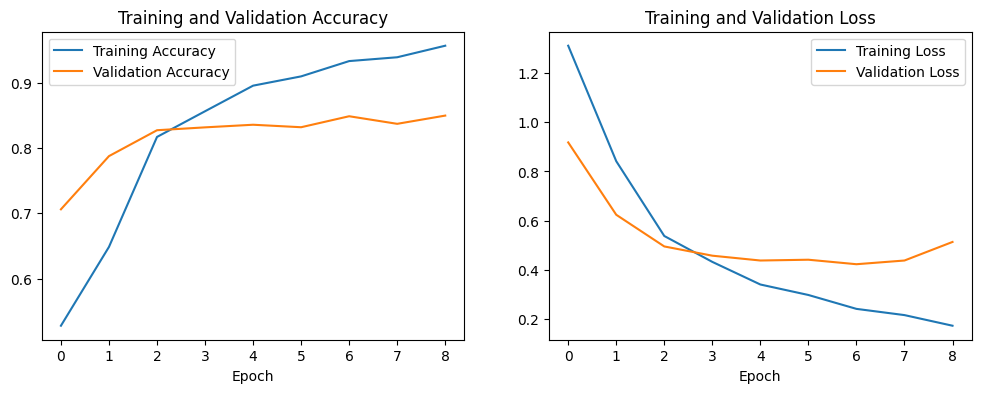

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

plt.show()